### 1. Import + CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince

from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

train = pd.read_csv('./train.csv').drop(columns=['ID'])
test = pd.read_csv('./test.csv').drop(columns=['ID'])

### 2. Selected EDA

In [2]:
#'임신 시도 또는 마지막 임신 경과 연수' 열 제거
train = train.drop(columns=['임신 시도 또는 마지막 임신 경과 연수'])
test = test.drop(columns=['임신 시도 또는 마지막 임신 경과 연수'])

In [3]:
train = train.drop(columns=['시술 유형'])
test = test.drop(columns=['시술 유형'])

In [4]:
train = train.drop(columns=['착상 전 유전 검사 사용 여부'])
test = test.drop(columns=['착상 전 유전 검사 사용 여부'])

In [5]:
# 정자 면역학적 요인 drop
train = train.drop('불임 원인 - 정자 면역학적 요인', axis=1)
test = test.drop('불임 원인 - 정자 면역학적 요인', axis=1)

# 남성 요인 MCA
features_male = ["불임 원인 - 남성 요인", "불임 원인 - 정자 농도", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"]
subset_train = train[features_male].copy()  # 선택한 feature만 사용
subset_test = test[features_male].copy()

# prince 라이브러리로 MCA 모델 훈련 (n_components=1로 차원 축소)
mca = prince.MCA(n_components=1)

# MCA 모델을 훈련시키고 차원 축소된 데이터 얻기
mca_result_train = mca.fit_transform(subset_train)
mca_result_test = mca.fit_transform(subset_test)

# 기존 남성 요인 feature 삭제
train = train.drop(columns=features_male)
test = test.drop(columns=features_male)

# 차원 축소된 데이터를 원본 데이터에 새로운 열로 추가
train["불임 원인 - 남성 요인"] = mca_result_train
test["불임 원인 - 남성 요인"] = mca_result_test

In [6]:
train = train.drop(columns=['IVF 임신 횟수', 'IVF 출산 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수'])
test = test.drop(columns=['IVF 임신 횟수', 'IVF 출산 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수'])

In [7]:
train.drop(['기증 배아 사용 여부'], axis=1, inplace=True)
test.drop(['기증 배아 사용 여부'], axis=1, inplace=True)

In [8]:
train.drop(['PGS 시술 여부'], axis=1, inplace=True)
test.drop(['PGS 시술 여부'], axis=1, inplace=True)

In [9]:
# '난자 채취 경과일' 열 제거
train = train.drop(columns=['난자 채취 경과일'])
test = test.drop(columns=['난자 채취 경과일'])

In [10]:
# '난자 해동 경과일' 열 제거
train = train.drop(columns=['난자 해동 경과일'])
test = test.drop(columns=['난자 해동 경과일'])

### 3. Encoding + Nan 제거

In [11]:
X = train.drop('임신 성공 여부', axis=1)
y = train['임신 성공 여부']

categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
]

numeric_columns = [
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [12]:

label_encoding_columns = [
    "시술 당시 나이",
    "총 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "DI 출산 횟수",
    "난자 기증자 나이",
    "정자 기증자 나이",
] # 나이 + 횟수

one_hot_encoding_columns = list(set(categorical_columns) - set(label_encoding_columns)) # 원핫인코딩용범주

# 카테고리형 컬럼들을 문자열로 변환
for col in label_encoding_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

for col in one_hot_encoding_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

In [13]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd

# Label Encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = X.copy()
X_test_encoded = test.copy()

X_train_encoded[label_encoding_columns] = ordinal_encoder.fit_transform(X[label_encoding_columns])
X_test_encoded[label_encoding_columns] = ordinal_encoder.transform(test[label_encoding_columns])

# One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X[one_hot_encoding_columns])

X_train_ohe = pd.DataFrame(ohe.transform(X[one_hot_encoding_columns]), columns=ohe.get_feature_names_out(one_hot_encoding_columns))
X_test_ohe = pd.DataFrame(ohe.transform(test[one_hot_encoding_columns]), columns=ohe.get_feature_names_out(one_hot_encoding_columns))

X_train_ohe.index = X.index
X_test_ohe.index = test.index

# Combine Encoded Features
X_train_final = pd.concat([X_train_encoded.drop(columns=one_hot_encoding_columns), X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_encoded.drop(columns=one_hot_encoding_columns), X_test_ohe], axis=1)

In [18]:
# 범주형 feature 변환 결과를 원래 변수에 반영

X_train_encoded = X_train_final
X_test_encoded = X_test_final

In [19]:
X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

### 4. Optuna를 통해 하이퍼파라미터 튜닝

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 한글 폰트 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 5.0),
        'tree_method': 'hist'  # CPU 가속 (GPU 사용 가능하면 'gpu_hist')
    }

    model = XGBClassifier(**param, random_state=42)
    
    # Train-test split
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_train_encoded, y, test_size=0.2, random_state=42
    )
    
    model.fit(X_train_split, y_train_split)
    
    y_pred_prob = model.predict_proba(X_val_split)[:, 1]
    roc_auc = roc_auc_score(y_val_split, y_pred_prob)
    
    return roc_auc

# Optuna 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)  # 10분 제한

# 최적의 파라미터 출력
best_params = study.best_params
print("Best parameters:", best_params)

# 최적 파라미터로 XGBoost 모델 학습
best_model = XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train_encoded, y)

# 피처 중요도 계산
feature_importances = best_model.feature_importances_

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Importance': feature_importances
})

# 중요도 기준 내림차순 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도의 총합 계산
total_importance = importance_df['Importance'].sum()

[I 2025-02-17 22:05:26,011] A new study created in memory with name: no-name-4eda1b7f-34b1-48b7-b46a-f3d080fc8d9b
[I 2025-02-17 22:05:34,786] Trial 0 finished with value: 0.7368870961141383 and parameters: {'max_depth': 10, 'learning_rate': 0.022500788051302203, 'n_estimators': 268, 'subsample': 0.7346247407401887, 'colsample_bytree': 0.6433021448953204, 'gamma': 1.211249513422138, 'min_child_weight': 8, 'scale_pos_weight': 1.2567567870326446}. Best is trial 0 with value: 0.7368870961141383.
[I 2025-02-17 22:05:38,904] Trial 1 finished with value: 0.7377028413137701 and parameters: {'max_depth': 7, 'learning_rate': 0.03620399376963864, 'n_estimators': 114, 'subsample': 0.8403280314433919, 'colsample_bytree': 0.9891552781575965, 'gamma': 1.6123539649080991, 'min_child_weight': 3, 'scale_pos_weight': 4.22168970584402}. Best is trial 1 with value: 0.7377028413137701.
[I 2025-02-17 22:05:43,278] Trial 2 finished with value: 0.7362207383803596 and parameters: {'max_depth': 9, 'learning_rate

Best parameters: {'max_depth': 4, 'learning_rate': 0.10762555962927534, 'n_estimators': 198, 'subsample': 0.8571630682079456, 'colsample_bytree': 0.6698860366084177, 'gamma': 1.7051207375280555, 'min_child_weight': 6, 'scale_pos_weight': 1.5991960070742133}


### 5. Feature_Importance Plot 그리기

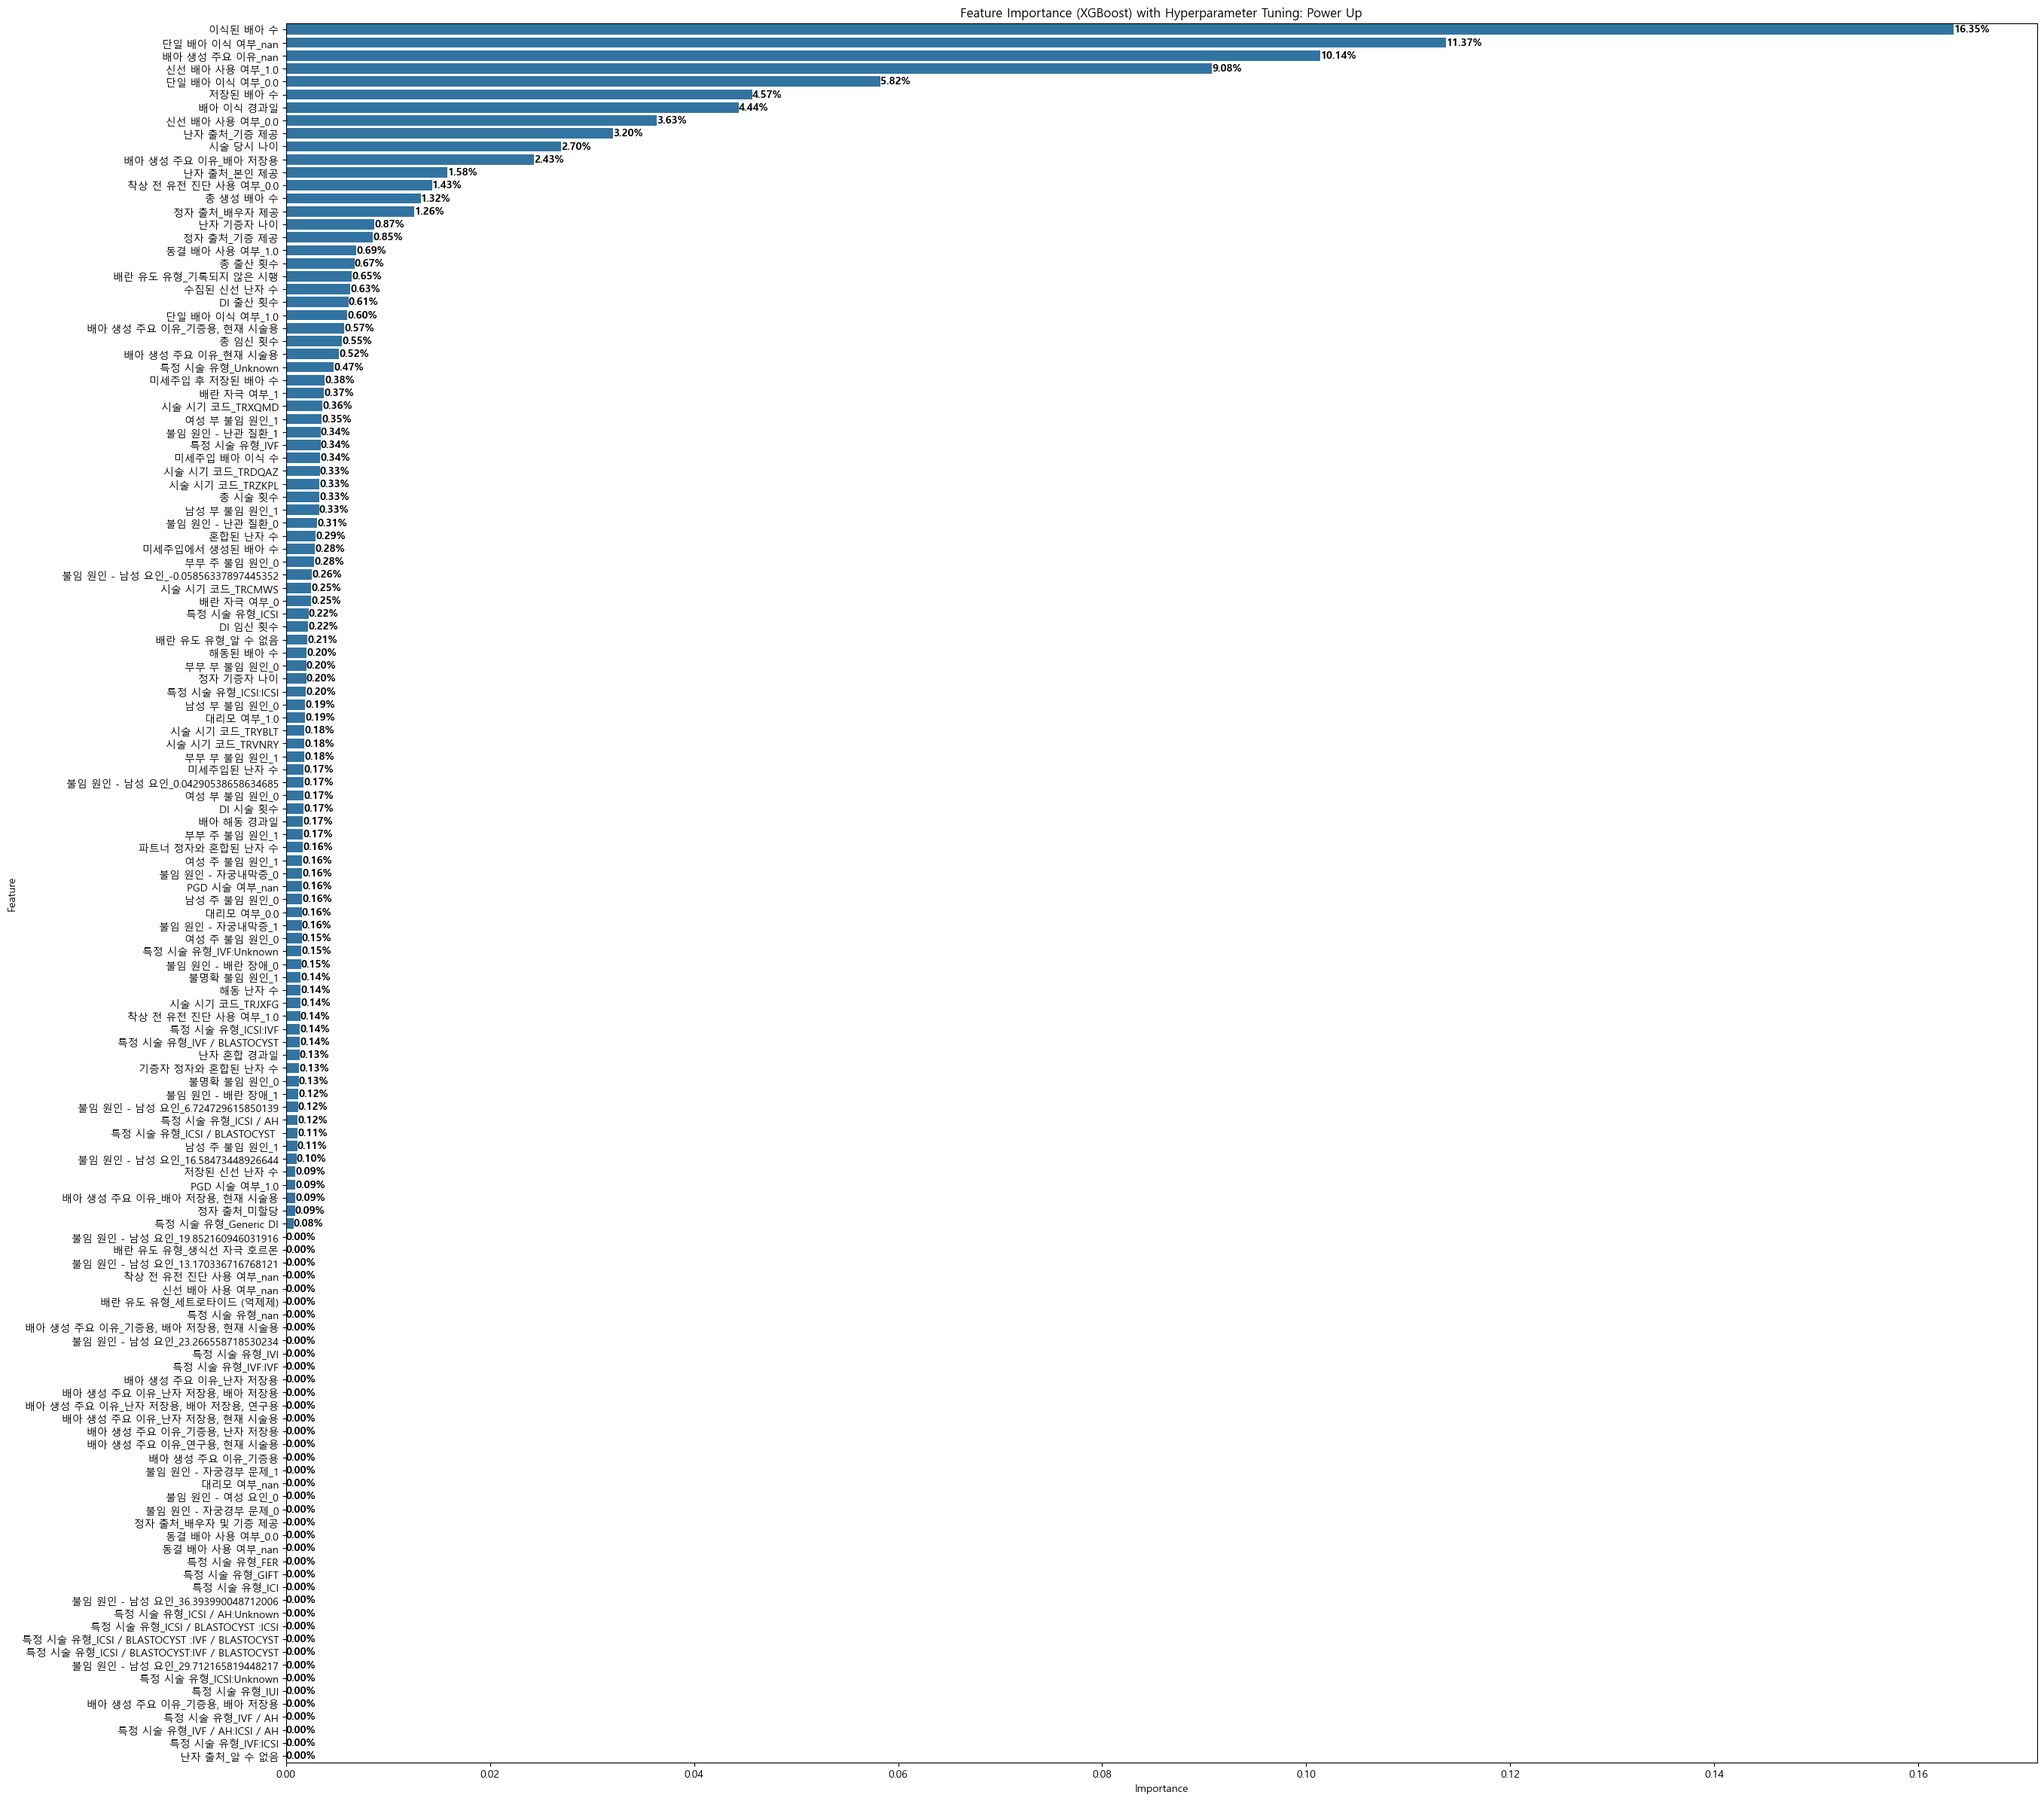

In [30]:
# 피처 중요도 그래프
plt.figure(figsize=(30, 30))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# 막대 옆에 백분율 표시
for index, value in enumerate(importance_df['Importance']):
    percentage = (value / total_importance) * 100
    plt.text(value, index, f'{percentage:.2f}%', va='center', fontweight='bold')

plt.title('Feature Importance (XGBoost) with Hyperparameter Tuning: Power Up')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [6]:
"""
# 중요도를 백분율로 변환
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# 0.009%보다 낮은 feature 찾기
low_importance_features = importance_df[importance_df['Percentage'] < 0.009]['Feature'].tolist()
print(f"Removing {len(low_importance_features)} low-importance features: {low_importance_features}")

# 해당 feature 제거
X_train_filtered = X_train_encoded.drop(columns=low_importance_features)

# 확인
print(f"New shape of X_train: {X_train_filtered.shape}")
"""

'\n# 중요도를 백분율로 변환\nimportance_df[\'Percentage\'] = (importance_df[\'Importance\'] / total_importance) * 100\n\n# 0.009%보다 낮은 feature 찾기\nlow_importance_features = importance_df[importance_df[\'Percentage\'] < 0.009][\'Feature\'].tolist()\nprint(f"Removing {len(low_importance_features)} low-importance features: {low_importance_features}")\n\n# 해당 feature 제거\nX_train_filtered = X_train_encoded.drop(columns=low_importance_features)\n\n# 확인\nprint(f"New shape of X_train: {X_train_filtered.shape}")\n'

### 6. Importance 하위 20 제거

In [34]:
# 중요도를 백분율로 변환
importance_df['Percentage'] = (importance_df['Importance'] / total_importance) * 100

# 중요도 기준 오름차순 정렬 후 하위 20개 feature 선택
low_importance_features = importance_df.nsmallest(20, 'Percentage')['Feature'].tolist()

print(f"Removing {len(low_importance_features)} low-importance features: {low_importance_features}")

# 선택된 feature만 제거
X_train_filtered = X_train_encoded.drop(columns=low_importance_features)
X_test_filtered = X_test_encoded.drop(columns=low_importance_features)

# 확인
print(f"New shape of X_train: {X_train_filtered.shape}")
print(f"New shape of X_test: {X_test_filtered.shape}")

Removing 20 low-importance features: ['불임 원인 - 남성 요인_19.852160946031916', '배란 유도 유형_생식선 자극 호르몬', '불임 원인 - 남성 요인_13.170336716768121', '착상 전 유전 진단 사용 여부_nan', '신선 배아 사용 여부_nan', '배란 유도 유형_세트로타이드 (억제제)', '특정 시술 유형_nan', '배아 생성 주요 이유_기증용, 배아 저장용, 현재 시술용', '불임 원인 - 남성 요인_23.266558718530234', '특정 시술 유형_IVI', '특정 시술 유형_IVF:IVF', '배아 생성 주요 이유_난자 저장용', '배아 생성 주요 이유_난자 저장용, 배아 저장용', '배아 생성 주요 이유_난자 저장용, 배아 저장용, 연구용', '배아 생성 주요 이유_난자 저장용, 현재 시술용', '배아 생성 주요 이유_기증용, 난자 저장용', '배아 생성 주요 이유_연구용, 현재 시술용', '배아 생성 주요 이유_기증용', '불임 원인 - 자궁경부 문제_1', '대리모 여부_nan']
New shape of X_train: (256351, 114)


### 7. Cross Validation (by K-Fold)

In [35]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# K-Fold 설정 (Stratified K-Fold 사용)
n_splits = 5  # 5-Fold Cross Validation
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# ROC-AUC 점수 저장 리스트
roc_auc_scores = []

# 교차 검증 루프
for train_index, val_index in skf.split(X_train_filtered, y):
    X_train_fold, X_val_fold = X_train_filtered.iloc[train_index], X_train_filtered.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # 모델 학습
    model = XGBClassifier(**best_params, random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # 예측 및 ROC-AUC 계산
    y_pred_prob = model.predict_proba(X_val_fold)[:, 1]
    roc_auc = roc_auc_score(y_val_fold, y_pred_prob)
    
    roc_auc_scores.append(roc_auc)

    print(f"Fold ROC-AUC Score: {roc_auc:.4f}")

# 평균 및 표준 편차 출력
mean_roc_auc = np.mean(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)
print(f"\nMean ROC-AUC: {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

Fold ROC-AUC Score: 0.7377
Fold ROC-AUC Score: 0.7423
Fold ROC-AUC Score: 0.7391
Fold ROC-AUC Score: 0.7375
Fold ROC-AUC Score: 0.7397

Mean ROC-AUC: 0.7393 ± 0.0018


Fold ROC-AUC Score: 0.7372

Fold ROC-AUC Score: 0.7425

Fold ROC-AUC Score: 0.7391

Fold ROC-AUC Score: 0.7373

Fold ROC-AUC Score: 0.7399


Mean ROC-AUC: 0.7392 ± 0.0020

(이게 49개 제거 시 결과였음)

Fold ROC-AUC Score: 0.7377

Fold ROC-AUC Score: 0.7423

Fold ROC-AUC Score: 0.7391

Fold ROC-AUC Score: 0.7375

Fold ROC-AUC Score: 0.7397


Mean ROC-AUC: 0.7393 ± 0.0018

(하위 20개 제거 시 좀 더 낫긴 하네.. 그러나 별 차이는..)

### 8. 최종 학습 (수정 필요)

In [43]:
from xgboost import XGBClassifier
import pandas as pd

# 최적의 하이퍼파라미터 적용
best_model = XGBClassifier(**best_params, random_state=42)

# 모델 학습
best_model.fit(X_train_filtered, y)

# 테스트 데이터에 대한 확률 예측
xgb_pred_proba = best_model.predict_proba(X_test_filtered)[:, 1]

# 샘플 제출 파일 로드 및 예측 확률 추가
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['probability'] = xgb_pred_proba

# 결과를 CSV 파일로 저장
sample_submission.to_csv('./xgboost_best_params_250217.csv', index=False)

print("✅ 모델 학습 완료! 결과 파일 저장됨: xgboost_best_params_250217.csv")

✅ 모델 학습 완료! 결과 파일 저장됨: xgboost_best_params_250217.csv


위에 코드 수정해야 함..
train, test가 제대로 반영 X

즉 dacon에 제출한 코드는 49개의 feature가 생존한 코드였음

코드 수정 완료! 이제 test에 대한 평가에도 non-important feature drop 반영!